# Divide and Conquer Algorithms

In [1]:
#Python version
!python --version #This assignment use the version of 3.6.0

Python 3.6.0 :: Anaconda 4.3.1 (64-bit)


### 1

In [2]:
class Point:
    
    #constructor method, input should be a point like: '(1,2)', 
    def __init__(self, point):
        self.str_data=tuple(point)
        self.x1 = self.str_data[0]
        self.y1 = self.str_data[1]

    #set X method: could change value of X
    def setX(self, x):
        self.x1 = x

    #set Y method: could change value of Y
    def setY(self, y):
        self.y1 = y

    #get X method: getX from tuple point
    def getX(self):
        return self.x1
    
    #get Y method: getY from tuple point
    def getY(self):
        return self.y1

    #get index of item
    def __getitem__(self,row):
        return self.str_data[row]

    #caclulate manhatten distance when input another object of Point class
    def manhattan_distance(self,other):
        ax=abs(self.x1-other.getX())
        ay=abs(self.y1-other.getY())
        return ax+ay

    #string representation
    def __repr__(self):
        return '({},{})'.format(self.x1,self.y1)

Test:

In [3]:
#put points a,b,c,d,e,f,g into Class
a=Point((9,14))
b=Point((-8,-6))
c=Point((5,3))
d=Point((5,4))
e=Point((7,6))
f=Point((9,10))
g=Point((6,4))
#test getX
print("getX of Point a: ",a.getX())
#test getY
print("getY of Point a: ", a.getY())
#test methods
print("manhattan distance between the point 'a' and point 'b': ", a.manhattan_distance(b))
#test print
print("Point a is: ",a)

getX of Point a:  9
getY of Point a:  14
manhattan distance between the point 'a' and point 'b':  37
Point a is:  (9,14)


***

###  2 & 3

In [4]:
class PointSet():

    #assume that the Pointset already has a number of points, and these points are from object of Points class
    def __init__(self,p_set):
        self.point_list=list(p_set)
        #sort X
        self.point_list=sorted(self.point_list,key=lambda x: x[0])

    #inset method: insert points into list
    def insertpoint(self,new_item):
        self.point_list.append(new_item)
        #every points indert needed to be sorted
        self.point_list = sorted(self.point_list, key=lambda x: x[0])
        return self.point_list

    #remove method: remove points
    def removepoint(self,target_item):
        if target_item in self.point_list:
            self.point_list.remove(target_item)
        else:
            #if not in list, yield error
            yield IOError
        return self.point_list

    #get item from index
    def __getitem__(self,index):
        return self.point_list[index]

    #Brute force method to search the closest points and their corresponding distance
    def BruteForce(self):
        n=len(self.point_list)
        distance = self.point_list[0].manhattan_distance(self.point_list[1])
        point1 = self.point_list[0]
        point2 = self.point_list[1]
        #if input points are only 2, just return these 2 points and distance
        if n == 2:
            return point1, point2, distance
        #compare one distance with others and get the most shortest one (method like bubble sort)
        for i in range(n - 1):
            for j in range(i + 1, n):
                if i != 0 and j != 1:
                    temp_dis = self.point_list[i].manhattan_distance(self.point_list[j])
                    if temp_dis < distance:
                        distance = temp_dis
                        point1, point2 = self.point_list[i], self.point_list[j]
        return point1, point2, distance

    #Divide and conquer function
    def DivideandConquer(self):
        n=len(self.point_list)
        #if points less than number of 3, returen to Brute force method
        if n<=3:
            return self.BruteForce()
        mid=n//2
        #divide points set to left and right
        self.left=PointSet(self.point_list[:mid])
        self.right=PointSet(self.point_list[mid:])
        
        #recursively
        P1,Q1,dis1=self.left.DivideandConquer()
        P2,Q2,dis2=self.right.DivideandConquer()
        
        #compare distance with left and right set of points
        if dis1<=dis2:
            real_d=dis1
            points=(P1,Q1)
        else:
            real_d=dis2
            points=(P2,Q2)
        
        #compare the distance from split area
        (P3,Q3,dis3)=self.DandC_Split_Pair(self.point_list,self.point_list,real_d,points)

        if real_d<=dis3:
            return points[0],points[1],real_d
        else:
            return P3,Q3,dis3

    def DandC_Split_Pair(self, point_x, point_y, delta, best_pair):
        # select midpoint on x-sorted array
        x_axis = point_x[len(self.point_list)//2][0]
        # Create a subarray of points not further than delta from
        s_y=[]
        for x in point_y:
            if x_axis-delta<=x[0]<=x_axis+delta:
                s_y.append(x)
        #sort Y
        s_y = sorted(s_y, key=lambda x: x[1])
        # assign best value to delta
        best = delta 
        # store length of subarray for quickness
        length_y = len(s_y) 
        for i in range(length_y - 1):
            for j in range(i + 1, min(i + 7, length_y)):
                k, q = s_y[i], s_y[j]
                dst = k.manhattan_distance(q)
                if dst < best:
                    best_pair = k, q
                    best = dst
        return best_pair[0], best_pair[1], best

    #string representation
    def __repr__(self):
        output=""
        for char in range(0,len(self.point_list)):
            output+=str(self.point_list[char])+str(",")
        output1=output.rstrip(",")
        real_output=str("[")+output1+str("]")
        return real_output

Test

In [5]:
#put all of points from question1 into a list
li=[a,b,c,d,e,f,g]
#put list into PointSet class
pointset1=PointSet(li)
print("Pointset is: ",pointset1)
#test insert point
l=Point((1,0))
pointset1.insertpoint(l)
print("pointset after inserting a point: ", pointset1)
#test Bruteforce
print("BruteForce",pointset1.BruteForce())
#test divide and conquer
print("DivideandConquer",pointset1.DivideandConquer())

Pointset is:  [(-8,-6),(5,3),(5,4),(6,4),(7,6),(9,14),(9,10)]
pointset after inserting a point:  [(-8,-6),(1,0),(5,3),(5,4),(6,4),(7,6),(9,14),(9,10)]
BruteForce ((5,3), (5,4), 1)
DivideandConquer ((5,3), (5,4), 1)


***

### 4
* a. Implement the naive O(n2) brute-force algorithm.
* b. Implement the divide-and-conquer algorithm.

For this question, according to time complexity. The big O for Bruteforce is n^2 and Divide and conquer is nlogn. So my prediction under the runtime is the time for brutefore is much slower than divide and conquer. The plot for Bruteforce should be expotential growth and Divide and conquer should be like a falt line at first and increase gentely at the end. The graph porves my thought.

Testing each algorithms'runtime for putting 10,000 points into point set.

In [6]:
#import random 10,000 samples for x and y from range -10,000 to 10,000
import random
x_li=random.sample(range(-10000,10000),10000)
y_li = random.sample(range(-10000,10000),10000)

#test 10,000 points and see what's time for Bruteforce and Divide and Conquer
sample_list=[]
for i in range(10000):
    a=(x_li[i],y_li[i])
    sample_list.append(a)

li=[]
for each in sample_list:
    li.append(Point(each))
real_pointset = PointSet(li)

In [7]:
#test for Bruteforce
import timeit
start = timeit.default_timer()
real_pointset.BruteForce()
stop = timeit.default_timer()
print('The time of BruteForce is :', stop-start)

The time of BruteForce is : 85.02747520309852


In [8]:
#test for divide and conquer
start = timeit.default_timer()
real_pointset.DivideandConquer()
stop = timeit.default_timer()
print('The time of DivideandConquer is :', stop-start)

The time of DivideandConquer is : 0.686855394280343


We can see that when we are running 10,000 points in a list, the time for bruteforce function is much slower than Divide and conquer. Now we can draw a plot for visualize more clearly and straightforward.

#### Plot runtime graph

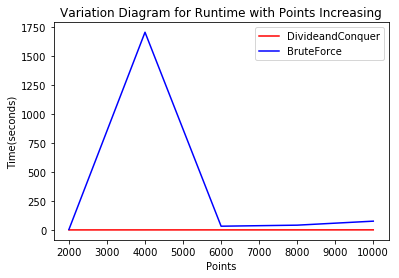

In [9]:
import matplotlib.pyplot as plt 
x_li=random.sample(range(-20000,20000),20000)
y_li = random.sample(range(-20000,20000),20000)
time_list1=[]
#set a-axis coordinate
num=[2000,4000,6000,8000,10000]
#count divide and conquer time
for i in num:
    sample_list=[]
    for j in range(i):
        a=(x_li[j],y_li[j])
        sample_list.append(a)
    li=[]
    for each in sample_list:
        li.append(Point(each))
    a_pointset = PointSet(li)
    start1 = timeit.default_timer()
    a_pointset.DivideandConquer()
    stop1 = timeit.default_timer()
    time_list1.append(stop1-start1)

#count Brute force time
time_list=[]
for i in num:
    sample_list=[]
    for j in range(i):
        a=(x_li[j],y_li[j])
        sample_list.append(a)
    li=[]
    for each in sample_list:
        li.append(Point(each))
    a_pointset = PointSet(li)
    start1 = timeit.default_timer()
    a_pointset.BruteForce()
    stop1 = timeit.default_timer()
    time_list.append(stop1-start1)

#plot runtime graph    
plt.figure(15)  
plt.subplot()
#plot with red line and blue line
plt.plot(num, time_list1,'r-')  
plt.plot(num, time_list, 'b-')  
#set xlabel, ylabel, title and legend
plt.xlabel('Points')
plt.ylabel('Time(seconds)')
plt.title('Variation Diagram for Runtime with Points Increasing')
plt.legend(labels=['DivideandConquer','BruteForce'],loc='best')
plt.show()      

***

### 5

* First step:

Def DivideandConquer(x,y)

Because I use build-in sorted function by python, every time I sorted, the complexity of time is T(1) = O(1).

We need to sort x-coordinate firstly, so the time complexity is O(1)


* Second step:

(Split in the middle)

(leftX, leftY)=(first-half(Lx)), first-half(Lx) sorted by y-coordinate)

(rightX, rightY)=(second-half(Lx)), second-half(Lx) sorted by y-coordinate)

Time complexity above is T(n)=O(1)+O(1)


* Third Step:

d_min_left = closest_pair(leftX, leftY)

d_min_right = closest_pair(rightX, rightY)

d_min=min(d_min_left, d_min_right)

Total time complexity is T(n)= 2T(2/n)+O(1)


* Forth Step:

L = list of all points in Ly not further than d_min from separation line, sorted by y-coordinate

Time complexity above is from function I written in class T(n)=O(n)+O(1)

* Last step:

d_x_min=compute minimum distance between x and the next 15 elements in L

if d_x_min < d_min then d_min=d_x_min


Adding all of Time complexity together: T(n)= O(1)+ O(1)+O(1)+ 2O(nlogn)+O(1)+ O(n)+O(1)+ O(1)
#### The total Time complexity is T(n)=O(n logn)


***

### 6

This part use python visualization Bokeh, the plot would gengerate in a new website.

In [10]:
import random
from bokeh.plotting import figure,output_file,show
from bokeh.models import Span, HoverTool, BoxSelectTool

#seed is used to fix the first time I use the generatoruser. So user could change seed to get the different diagram
random.seed(52)

#get 200 random numbers without repetition from range -200 to 200
x_li=random.sample(range(-200,200),200)
y_li = random.sample(range(-200,200),200)

#get points from list becomes objects of Point class 
x_list=[]
y_list=[]
point_list=[]
for i in range(30):
    #get all of X for points (X,Y)
    x_list.append(x_li[i])
    #get all of Y for points (X,Y)
    y_list.append(y_li[i])
    #get random point
    a=(x_li[i],y_li[i])
    point_list.append(a)
#get points from list becomes objects of Point class 
total_li=[]
for each in point_list:
    total_li.append(Point(each))

#sort x axis
sorted_x=sorted(point_list,key=lambda x: x[0])

#get x axis for plot a graph
x_axis=abs(sorted_x[0][0]-sorted_x[-1][0])

#get middle horizontal line
middle_axis=x_axis/2+sorted_x[0][0]


#get y axis after sorting
sorted_y=sorted(point_list,key=lambda x: x[1])
y_axis=sorted_y[0][1]-sorted_y[-1][1]

#put all of points into PointSet class
point_set=PointSet(total_li)
#get the closest point and their distance
my_point=point_set.DivideandConquer()

#draw split left line
left_line=middle_axis-my_point[2]
#draw split right line
right_line=middle_axis+my_point[2]

#add hover tool
TOOLS=[BoxSelectTool(),HoverTool()]
p=figure(plot_width=500,plot_height=400,tools=TOOLS)
#add an orthogon frame, label size, color, and transparence
p.circle(x_list,y_list,size=10,color="green",alpha=0.5)
#add middle line
middle_line = Span(location=middle_axis,
                   dimension='height', line_color='orange',
                    line_dash='dashed', line_width=3)
p.add_layout(middle_line)

#add left line for spilt area
left_ax = Span(location=left_line,
            dimension='height', line_color='red',
            line_dash='dashed', line_width=3)
p.add_layout(left_ax)

#add right line for spilt area
right_ax = Span(location=right_line,
            dimension='height', line_color='red',
            line_dash='dashed', line_width=3)
p.add_layout(right_ax)

#draw a line between 2 cloest points
p.line([my_point[0][0],my_point[1][0]],[my_point[0][1],my_point[1][1]],line_width=4)

#fill in color with split area
p.quad(top=[sorted_y[-1][1]], bottom=[sorted_y[0][1]], left=[left_line],
       right=[right_line], color="#CAB2D6",alpha=0.5)

#show x-axis tag
p.xaxis.axis_label="X-coordinate"
#show y-axis tag
p.yaxis.axis_label="Y-coordinate"

#save the file to directory
output_file("scatter.html")
#show the graph
show(p)